# Exercise 1: Predicting the temperature

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
# Y is the target variable
Y = weather_df['temperature']

# X is the feature set
X = weather_df[['humidity','windspeed', 'windbearing', 'pressure']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

predictions = lrm.predict(X)
errors = np.array(Y) - predictions

# Estimated coefficients.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528537


### Assumption two: the error term should be zero on average

In [55]:
print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -5.563350793091222e-15


Since the mean is very close to zero, we can assume that the average of the error terms is zero.

### Assumption three: homoscedasticity

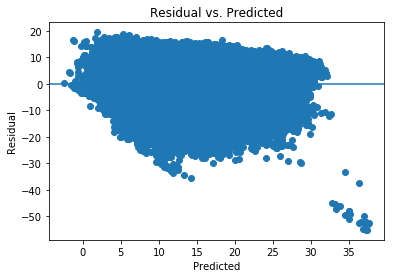

In [56]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [57]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


Both the chart and the test results show us that there is heteroscedasticity problem in our model. Hence, the accuracies of our estimated parameters are not reliable.

### Assumption four: low multicollinearity

In [58]:
X.corr()

,humidity,windspeed,windbearing,pressure
humidity,1.000000,-0.224951,0.000735,0.005454
windspeed,-0.224951,1.000000,0.103822,-0.049263
windbearing,0.000735,0.103822,1.000000,-0.011651
pressure,0.005454,-0.049263,-0.011651,1.000000


From the above table, the correlation between the features are very low. The mostly correlated variables are windspeed and humidity and the correlation is just -0.22.

### Assumption five: error terms should be uncorrelated with one other

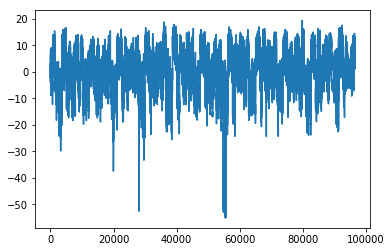

In [59]:
plt.plot(errors)
plt.show()

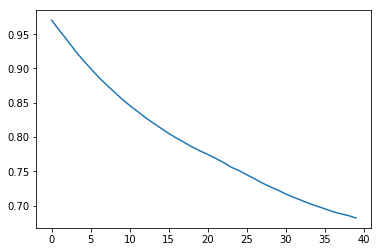

In [60]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

It seems that the errors are serially correlated.

### Assumption six: features shouldn't be correlated with the errors

In [61]:
df = pd.concat([X, pd.DataFrame(errors, columns=["error"])], axis=1)
df.corr().iloc[:,-1:]

,error
humidity,-2.503115e-14
windspeed,6.447441e-15
windbearing,2.019223e-16
pressure,-1.009730e-15
error,1.000000e+00


As evidenced above, the correlation between the features and the errors are very low.

### An important remark on the normality of the errors

In [9]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252227 and p value is 0.0
Normality test statistics is 3375.4323076994956 and p value is 0.0


Normality tests indicate that the errors of the model are not distributed normally. This implies that the test statistics for the coefficients are problematic.

# Exercise 2: House prices

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [6]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [7]:
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True).columns)

In [8]:
# Y is the target variable
Y = house_prices_df['saleprice']
# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars'] + dummy_column_names]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

predictions = lrm.predict(X)
errors = np.array(Y) - predictions

# Estimated coefficients.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [26607.69020321    50.07558239 19332.50120143 17686.19145758
  9636.36572997 28246.39648131  3588.30376332 -5517.62395142]

Intercept: 
 -109620.19304885456


### Assumption two: the error term should be zero on average

In [9]:
print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -1.148205913909494e-11


The average error is quite close to zero so we can assume that it is zero.

### Assumption three: homoscedasticity

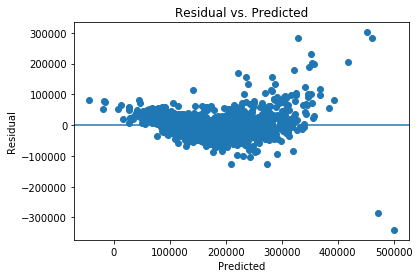

In [10]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [11]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 426.074 and p value is 1.16e-94
Levene test statistic value is 470.674 and p value is 6.97e-97


Both the chart and the test statistics indicate that our model suffers from heteroscedasticity. This implies that the accuracies of our estimations are not reliable.

### Assumption four: low multicollinearity

In [12]:
X.corr()

,overallqual,grlivarea,garagecars,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave
overallqual,1.000000,0.593007,0.600671,0.171854,-0.064666,0.126972,-0.195515,0.058823
grlivarea,0.593007,1.000000,0.467247,0.024275,-0.001070,0.132936,-0.154239,0.044121
garagecars,0.600671,0.467247,1.000000,0.102851,-0.090477,0.175167,-0.221834,-0.020025
mszoning_FV,0.171854,0.024275,0.102851,1.000000,-0.022722,-0.416608,-0.090435,0.013866
mszoning_RH,-0.064666,-0.001070,-0.090477,-0.022722,1.000000,-0.203158,-0.044101,0.006762
mszoning_RL,0.126972,0.132936,0.175167,-0.416608,-0.203158,1.000000,-0.808585,0.045348
mszoning_RM,-0.195515,-0.154239,-0.221834,-0.090435,-0.044101,-0.808585,1.000000,-0.003127
street_Pave,0.058823,0.044121,-0.020025,0.013866,0.006762,0.045348,-0.003127,1.000000


We have some highly correlated features like garagearea and garagecars.

### Assumption five: error terms should be uncorrelated with one other

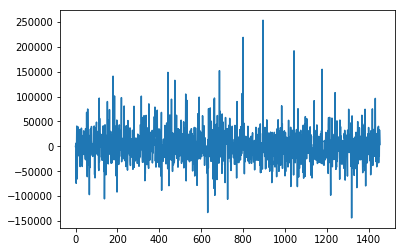

In [92]:
plt.plot(errors)
plt.show()

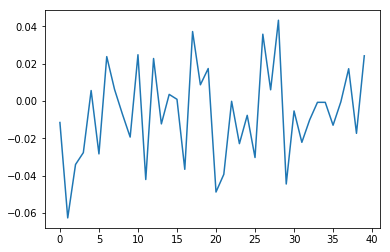

In [93]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

The charts above indicate that the error terms are uncorrelated with each other.

### Assumption six: features shouldn't be correlated with the errors

In [94]:
df = pd.concat([X, pd.DataFrame(errors, columns=["error"])], axis=1)
df.corr().iloc[:,-1:]

,error
overallqual,0.019523
grlivarea,0.046022
garagecars,0.051089
garagearea,0.049024
totalbsmtsf,-0.007251
mszoning_FV,0.021536
mszoning_RH,-0.003766
mszoning_RL,-0.020791
mszoning_RM,0.019275
street_Pave,-0.000214


As evidenced in the table above, the features and the errors are uncorrelated.

### An important remark on the normality of the errors

In [95]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 2843.9980035501744 and p value is 0.0
Normality test statistics is 385.02559105244535 and p value is 2.4703313347752903e-84


Normality tests indicate that the errors of the model are not distributed normally. This implies that the test statistics for the coefficients are problematic.